In [1]:
import pandas as pd
from ggplot import *
from datetime import timedelta

project_id = "the-d-team-164512"

In [261]:
query = """\
SELECT
  *
FROM
  dthon.transactions t
  JOIN dthon.drug_lookup d
    ON d.MasterProductID = t.Drug_ID
  JOIN dthon.patients_lookup p
    ON p.patient_id = t.patient_id
  JOIN dthon.stores_lookup s
    ON t.store_id = s.store_id
WHERE
  -- all below share t.prescriber_id = 37413
  p.patient_id IN (204326, 406627, 191363, 396088, 200347, 437300, 315995, 379084, 267907, 167620,
  -- most prolific transactions
  90353, 285313, 276782, 516072, 31398, 393481, 361009, 144554, 499209, 65911, 377022, 378200,
  -- highest spend
  516072, 255183, 810, 406431, 67198, 313783, 231653, 168767, 431070, 276782, 144554, 69371,
  -- most $0 transactions
  90353, 31398, 285313, 377022, 63668, 130048, 278253, 499209, 361009, 33820, 525231, 211428
  )
"""

df_204326 = pd.read_gbq(query, project_id)
df_204326.t_Prescription_Week = pd.Series(df_204326.t_Prescription_Week).apply(pd.to_datetime, format='%Y-%m-%d')
df_204326.t_Dispense_Week = pd.Series(df_204326.t_Dispense_Week).apply(pd.to_datetime, format='%Y-%m-%d')
df_204326.head(3)

Waiting for job to complete...
Waiting for job to complete...


,t_Patient_ID,t_Store_ID,t_Prescriber_ID,t_Drug_ID,t_SourceSystem_Code,t_Prescription_Week,t_Dispense_Week,t_Drug_Code,t_NHS_Code,t_IsDeferredScript,...,d_ATCLevel2Code,d_ATCLevel1Code,p_Patient_ID,p_gender,p_year_of_birth,p_postcode,s_Store_ID,s_StateCode,s_postcode,s_IsBannerGroup
0,378200,1373,24999,9553,A,2011-05-08,2011-08-28,9475_90,8607B,False,...,A10,A,378200,M,1944,7010,1373,TAS,7011,0
1,378200,1373,24999,3512,A,2013-05-26,2013-12-01,9274_90,8607B,False,...,A10,A,378200,M,1944,7010,1373,TAS,7011,0
2,378200,1373,24999,3512,A,2014-05-25,2015-01-11,9274_90,8607B,False,...,A10,A,378200,M,1944,7010,1373,TAS,7011,0


what seems a clear differene between a patient and presumably an old peoples home

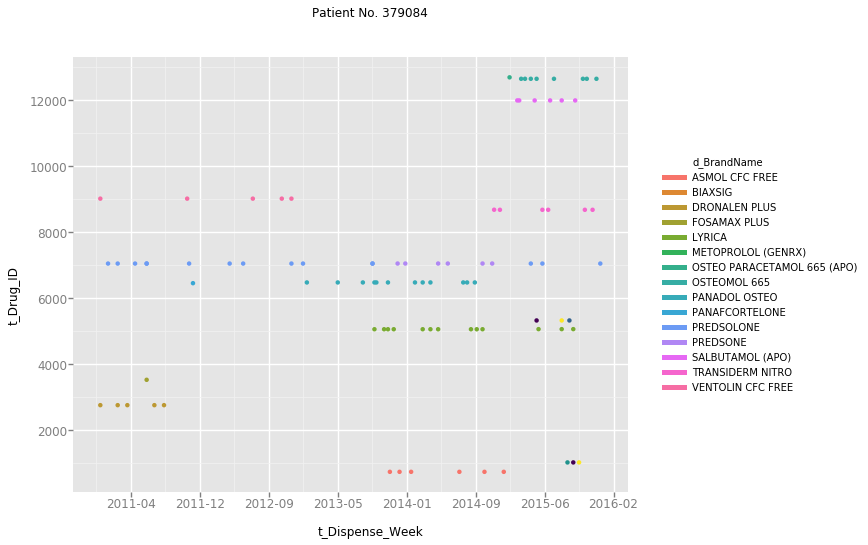

<ggplot: (311865271)>


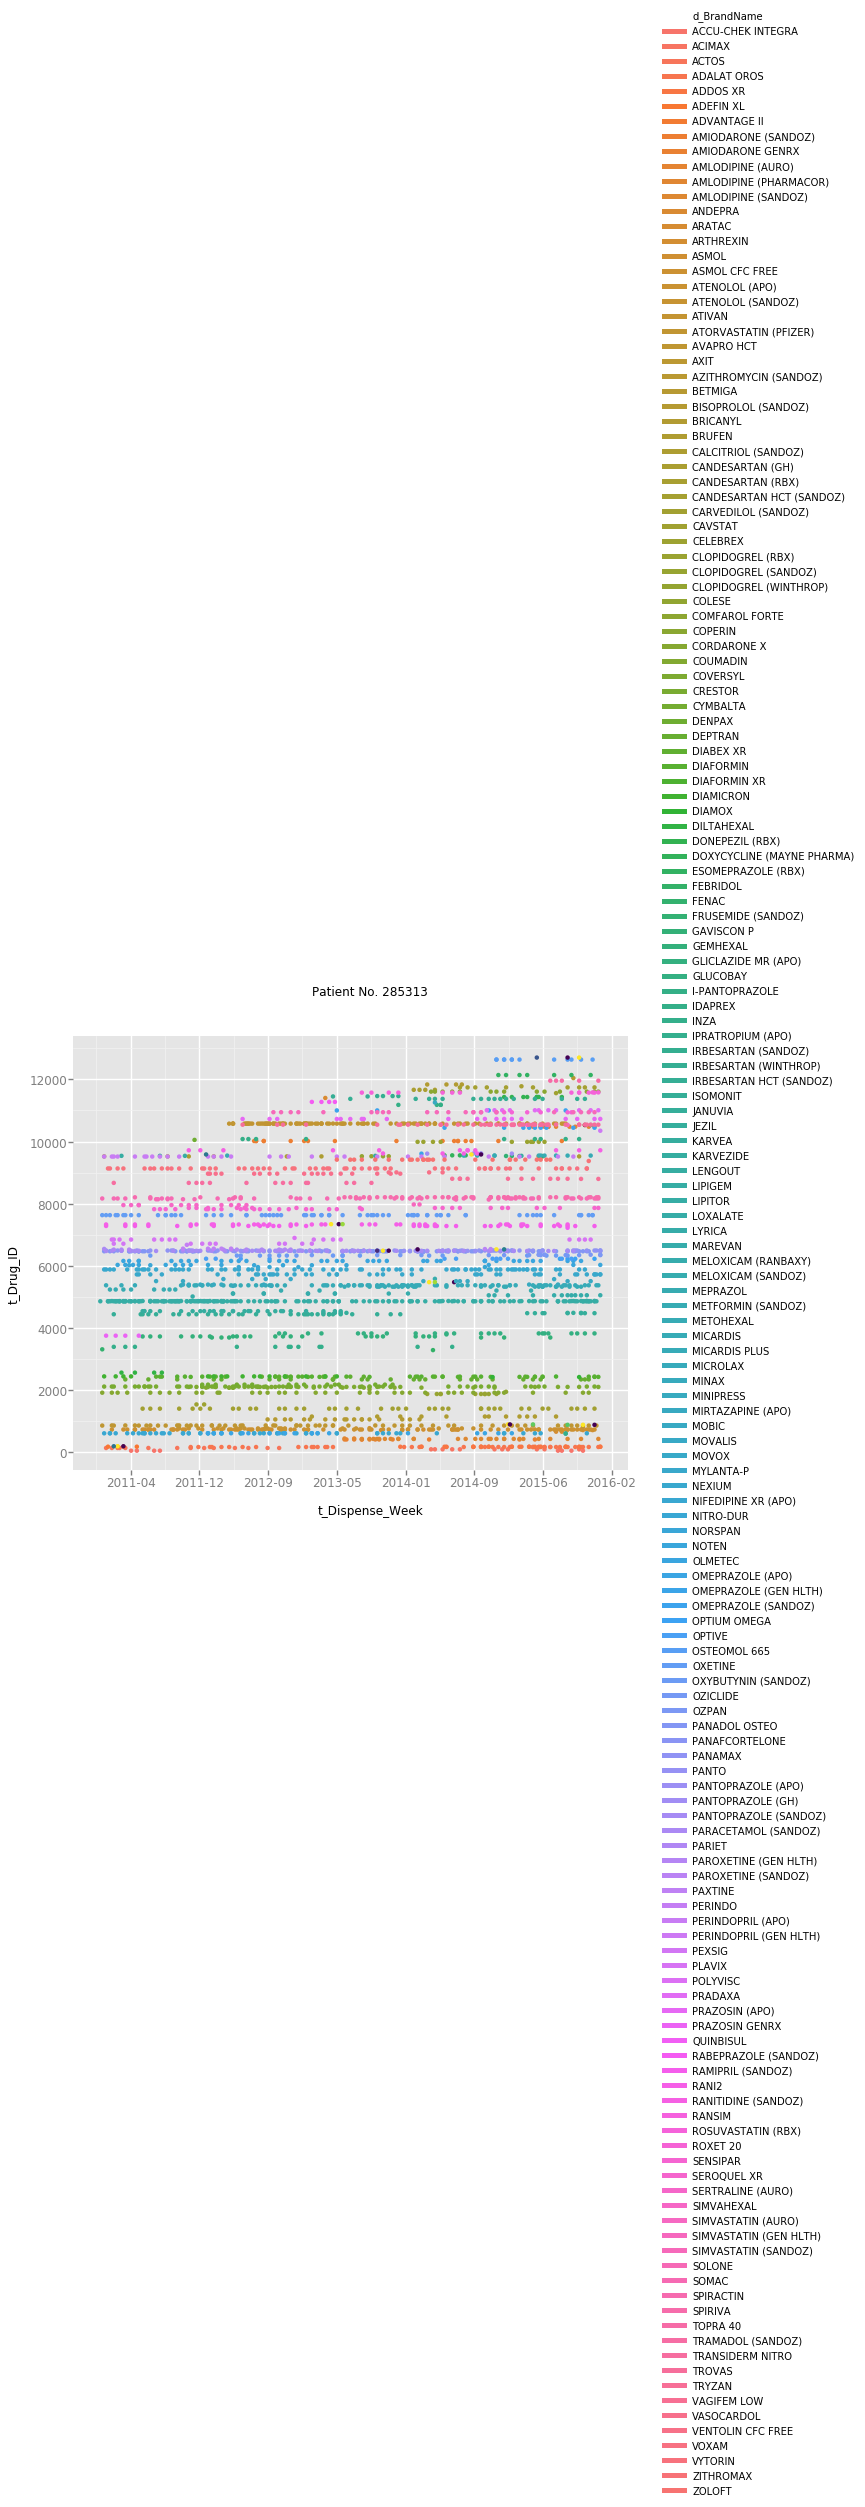

<ggplot: (311021516)>


In [269]:
def plot_patient(patient_id):
    return ggplot(
        aes(x='t_Dispense_Week', y='t_Drug_ID', colour='d_BrandName'),
        data=df_204326[df_204326['t_Patient_ID'] == patient_id]) +\
        geom_point() +\
        labs(title = 'Patient No. %s' % patient_id) +\
        scale_x_date(labels = date_format("%Y-%m"))

# for patient_id in pd.Series.unique(df_204326.t_Patient_ID):
#     print(plot_patient(patient_id))

print(plot_patient(379084))
print(plot_patient(285313))

Not convinced if the chart below with an attempted fill works

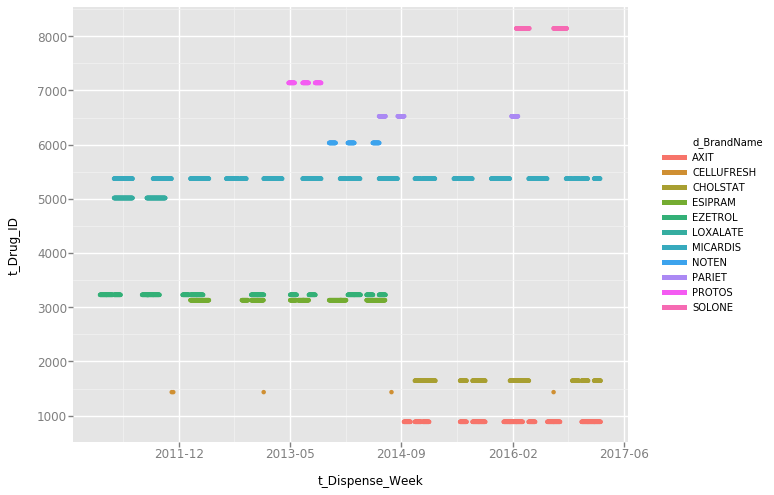

<ggplot: (306099036)>

In [229]:
df_play = df_204326[df_204326['t_Patient_ID'] == 204326][['t_Dispense_Week', 't_Drug_ID', 'd_BrandName', 'd_PackSizeNumber']]
df_new = pd.DataFrame()
for index, row in df_play.iterrows():
    for count in range(1, (row['d_PackSizeNumber']+1)):
        new_row = row.copy()
        new_row.t_Dispense_Week = new_row.t_Dispense_Week + timedelta(days = count)
        df_new = df_new.append([new_row], ignore_index=True)

df_new.sort_values(by = 't_Dispense_Week', inplace = True)
ggplot(
    aes(x = 't_Dispense_Week', y='t_Drug_ID', colour='d_BrandName'),
    data=df_new) +\
    geom_point() +\
    scale_x_date(labels = date_format("%Y-%m"))